In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('Colo.csv')

In [4]:
df.head()

,Date,Temp C
0,1/1/2009,31
1,2/1/2009,32
2,3/1/2009,31
3,4/1/2009,32
4,5/1/2009,31


In [5]:
df.Date=pd.to_datetime(df.Date)
df=df.set_index('Date')

In [6]:
df.head()

,Temp C
Date,
2009-01-01,31
2009-02-01,32
2009-03-01,31
2009-04-01,32
2009-05-01,31


In [7]:
train, test = df[:-12], df[-12:]


In [8]:
scaler=MinMaxScaler()
scaler.fit(train)
train=scaler.transform(train)
test=scaler.transform(test)

In [9]:
n_input=12
n_features=1

generator=TimeseriesGenerator(train, train, length=n_input, batch_size=6)

model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit_generator(generator, epochs=180)

Epoch 1/180
666/666 [==============================] - 13s 19ms/step - loss: 0.0133
Epoch 2/180
666/666 [==============================] - 14s 22ms/step - loss: 0.0036
Epoch 3/180
666/666 [==============================] - 14s 21ms/step - loss: 0.0034 0s - los
Epoch 4/180
666/666 [==============================] - 14s 21ms/step - loss: 0.0031 ETA: 0s - loss: 0.003
Epoch 5/180
666/666 [==============================] - 14s 21ms/step - loss: 0.0026
Epoch 6/180
666/666 [==============================] - 15s 22ms/step - loss: 0.0026
Epoch 7/180
666/666 [==============================] - 16s 24ms/step - loss: 0.0024
Epoch 8/180
666/666 [==============================] - 15s 22ms/step - loss: 0.0023
Epoch 9/180
666/666 [==============================] - 15s 22ms/step - loss: 0.0022
Epoch 10/180
666/666 [==============================] - 14s 21ms/step - loss: 0.0019
Epoch 11/180
666/666 [==============================] - 14s 21ms/step - loss: 0.0018
Epoch 12/180
666/666 [=====================

666/666 [==============================] - 14s 21ms/step - loss: 9.6160e-04
Epoch 94/180
666/666 [==============================] - 14s 21ms/step - loss: 9.5260e-04
Epoch 95/180
666/666 [==============================] - 14s 21ms/step - loss: 9.4621e-04
Epoch 96/180
666/666 [==============================] - 14s 21ms/step - loss: 9.6442e-04
Epoch 97/180
666/666 [==============================] - 14s 21ms/step - loss: 9.4145e-04
Epoch 98/180
666/666 [==============================] - 14s 21ms/step - loss: 9.5135e-04
Epoch 99/180
666/666 [==============================] - 14s 21ms/step - loss: 9.4911e-04
Epoch 100/180
666/666 [==============================] - 14s 21ms/step - loss: 9.5613e-04
Epoch 101/180
666/666 [==============================] - 14s 21ms/step - loss: 9.5296e-04
Epoch 102/180
666/666 [==============================] - 14s 21ms/step - loss: 9.5205e-04
Epoch 103/180
666/666 [==============================] - 14s 21ms/step - loss: 9.6188e-04
Epoch 104/180
666/666 [=======

In [10]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:,:],[[pred_list[i]]], axis=1)
    

In [11]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index=df[-n_input:].index, columns=['Predictions'])

df_test = pd.concat([df, df_predict], axis=1)

In [12]:
df_test.tail(12)

,Temp C,Predictions
Date,,
2019-12-20,30,31.550769
2019-12-21,29,31.412115
2019-12-22,29,31.339452
2019-12-23,31,31.303220
2019-12-24,31,31.300576
2019-12-25,31,31.308756
2019-12-26,31,31.317361
2019-12-27,31,31.282373
2019-12-28,30,31.258041


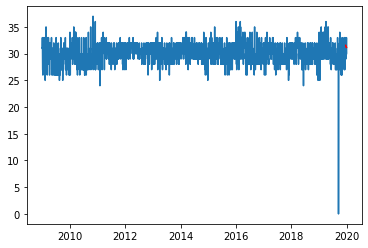

In [13]:
plt.plot(df_test.index, df_test['Temp C'])
plt.plot(df_test.index, df_test['Predictions'], color='r')
plt.show()


In [14]:
train = df

scaler.fit(train)
train=scaler.transform(train)

n_input=12
n_features=1

generator=TimeseriesGenerator(train, train, length=n_input, batch_size=6)

model.fit_generator(generator, epochs=180)

pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:,:],[[pred_list[i]]], axis=1)

    

Epoch 1/180
668/668 [==============================] - 11s 17ms/step - loss: 9.4351e-04
Epoch 2/180
668/668 [==============================] - 12s 19ms/step - loss: 9.2643e-04 0s - loss: 9. - ETA: 0s - loss: 9.
Epoch 3/180
668/668 [==============================] - 14s 22ms/step - loss: 9.3335e-04
Epoch 4/180
668/668 [==============================] - 14s 21ms/step - loss: 9.4250e-04
Epoch 5/180
668/668 [==============================] - 14s 21ms/step - loss: 9.4836e-04
Epoch 6/180
668/668 [==============================] - 14s 21ms/step - loss: 9.2496e-04
Epoch 7/180
668/668 [==============================] - 14s 21ms/step - loss: 9.4038e-04
Epoch 8/180
668/668 [==============================] - 14s 21ms/step - loss: 9.4380e-04
Epoch 9/180
668/668 [==============================] - 14s 22ms/step - loss: 9.3902e-04
Epoch 10/180
668/668 [==============================] - 15s 22ms/step - loss: 9.3553e-04
Epoch 11/180
668/668 [==============================] - 14s 21ms/step - loss: 9.2050

668/668 [==============================] - 14s 21ms/step - loss: 9.2655e-04 2s - lo
Epoch 91/180
668/668 [==============================] - 14s 21ms/step - loss: 9.2538e-04
Epoch 92/180
668/668 [==============================] - 14s 21ms/step - loss: 9.2551e-04
Epoch 93/180
668/668 [==============================] - 14s 21ms/step - loss: 9.1908e-04 0s - loss: 
Epoch 94/180
668/668 [==============================] - 14s 21ms/step - loss: 9.3611e-04 0s - loss: 9.433
Epoch 95/180
668/668 [==============================] - 14s 21ms/step - loss: 9.1795e-04
Epoch 96/180
668/668 [==============================] - 14s 21ms/step - loss: 9.2511e-04
Epoch 97/180
668/668 [==============================] - 14s 21ms/step - loss: 9.2616e-04
Epoch 98/180
668/668 [==============================] - 14s 21ms/step - loss: 9.2918e-04
Epoch 99/180
668/668 [==============================] - 14s 21ms/step - loss: 9.2847e-04
Epoch 100/180
668/668 [==============================] - 14s 21ms/step - loss: 9.2270e

Epoch 178/180
668/668 [==============================] - 14s 21ms/step - loss: 9.1811e-04
Epoch 179/180
668/668 [==============================] - 14s 21ms/step - loss: 9.2133e-04
Epoch 180/180
668/668 [==============================] - 14s 21ms/step - loss: 9.0077e-04


In [15]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(days=x) for x in range(0,13)]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [16]:
future_dates.tail(12)

,Temp C
2020-01-01,NaN
2020-01-02,NaN
2020-01-03,NaN
2020-01-04,NaN
2020-01-05,NaN
2020-01-06,NaN
2020-01-07,NaN
2020-01-08,NaN
2020-01-09,NaN
2020-01-10,NaN


In [17]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index=future_dates[-n_input:].index, columns=['Predictions'])

df_proj = pd.concat([df,df_predict], axis=1)

In [18]:
df_proj.tail(12)

,Temp C,Predictions
2020-01-01,NaN,30.998089
2020-01-02,NaN,31.031622
2020-01-03,NaN,31.003111
2020-01-04,NaN,31.007778
2020-01-05,NaN,31.042938
2020-01-06,NaN,31.081993
2020-01-07,NaN,31.111289
2020-01-08,NaN,31.142797
2020-01-09,NaN,31.156393
2020-01-10,NaN,31.092060


No handles with labels found to put in legend.


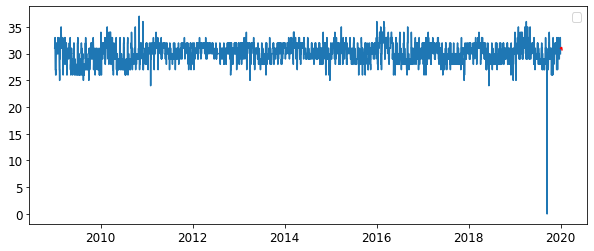

In [19]:
plt.figure(figsize=(10,4))
plt.plot(df_proj.index,df_proj['Temp C'])
plt.plot(df_proj.index,df_proj['Predictions'],color='r')
plt.legend(loc='best',fontsize='large')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()